In [1]:
%matplotlib inline

In [2]:
from collections import defaultdict

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-23_213842_preliminary.npd')

In [14]:
print(npd.node_names())

['SingleSweep0', 'SingleSweepStream1', 'ADCSnap2', 'SingleSweep3', 'SingleSweepStream4', 'ADCSnap5', 'SingleSweep6', 'SingleSweepStream7', 'ADCSnap8', 'SingleSweep9', 'SingleSweepStream10', 'ADCSnap11', 'SingleSweep12', 'SingleSweepStream13', 'ADCSnap14', 'SingleSweep15', 'SingleSweepStream16', 'ADCSnap17', 'SingleSweep18', 'SingleSweepStream19', 'ADCSnap20']


In [5]:
swp_list = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweep') and not 'Stream' in name]
sss_list = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]
snap_list = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]
print([(snap.x.ptp(), snap.y.ptp()) for snap in snap_list])

[(11.0, 10.0), (9.0, 8.0), (9.0, 10.0), (10.0, 10.0), (11.0, 10.0), (10.0, 9.0), (10.0, 11.0)]


In [6]:
swp_dict = defaultdict(list)
sss_dict = defaultdict(list)
for swp, sss in zip(swp_list, sss_list):
    swp_dict[sss.state.lo_index].append(swp)
    sss_dict[sss.state.lo_index].append(sss)

# Tone centering

In [7]:
print([sss.stream.tone_offset_frequency() for sss in sss_list])

[array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.])]


# Forward scattering versus frequency

In [8]:
xlabel0 = 'frequency / MHz'
ylabel0 = '$|S_{21}|^2$ / dB'
title0 = r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'

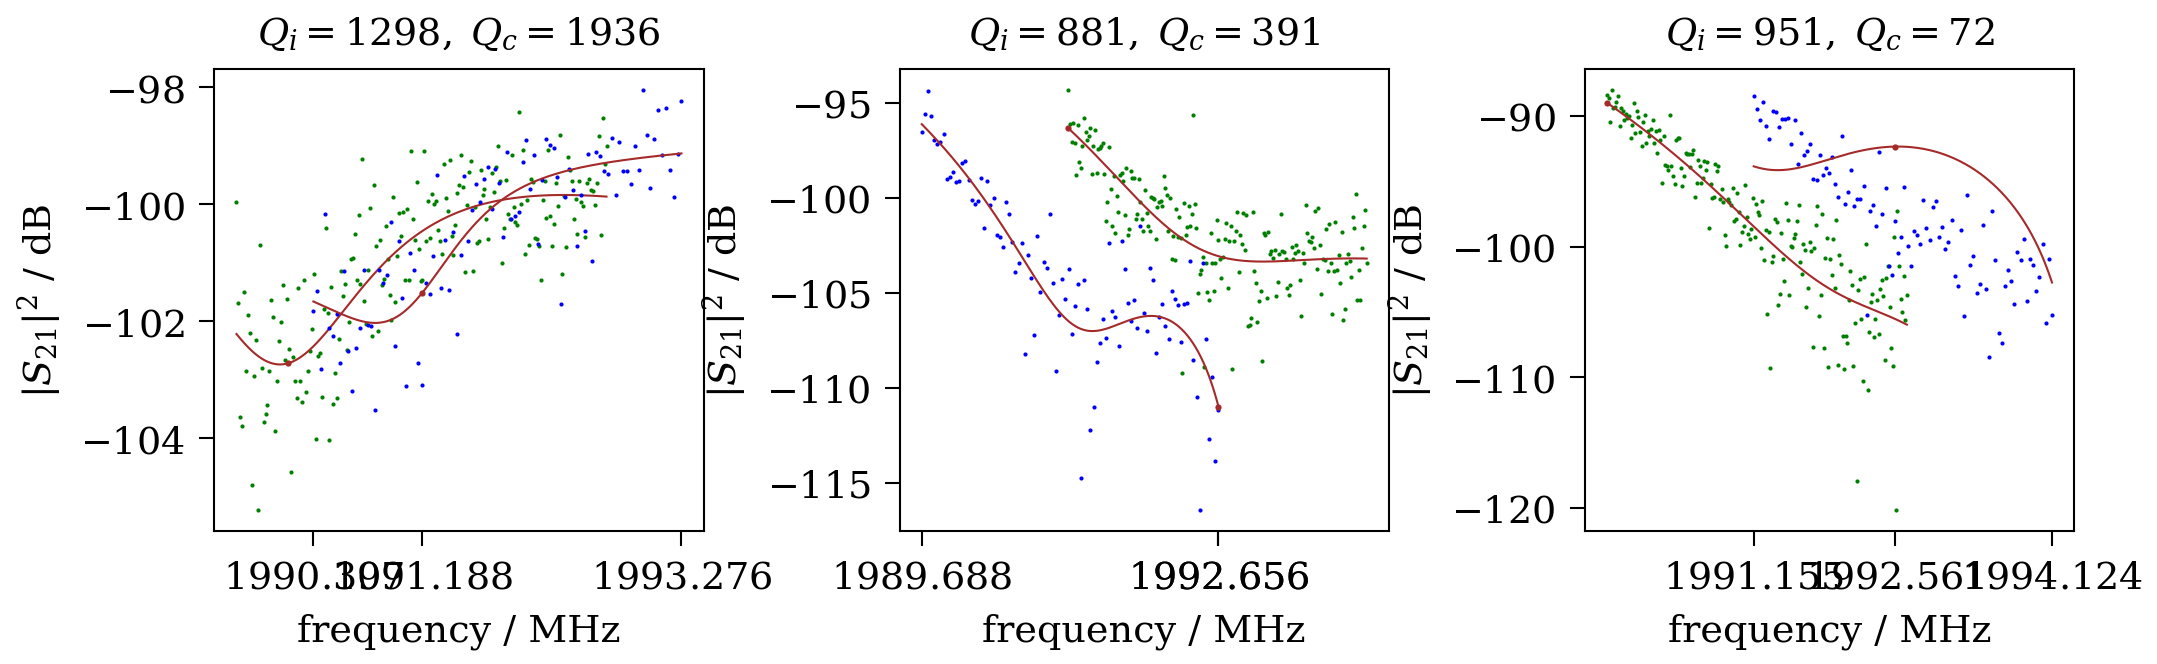

In [10]:
channel = 0
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(xlabel0)
    ax.set_ylabel(ylabel0)
    plot_resonator.amplitude(ax, sss.resonator, normalize=False, data_color='green')
    plot_resonator.amplitude(ax, swp.resonator, normalize=False)
    ax.set_title(title0.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

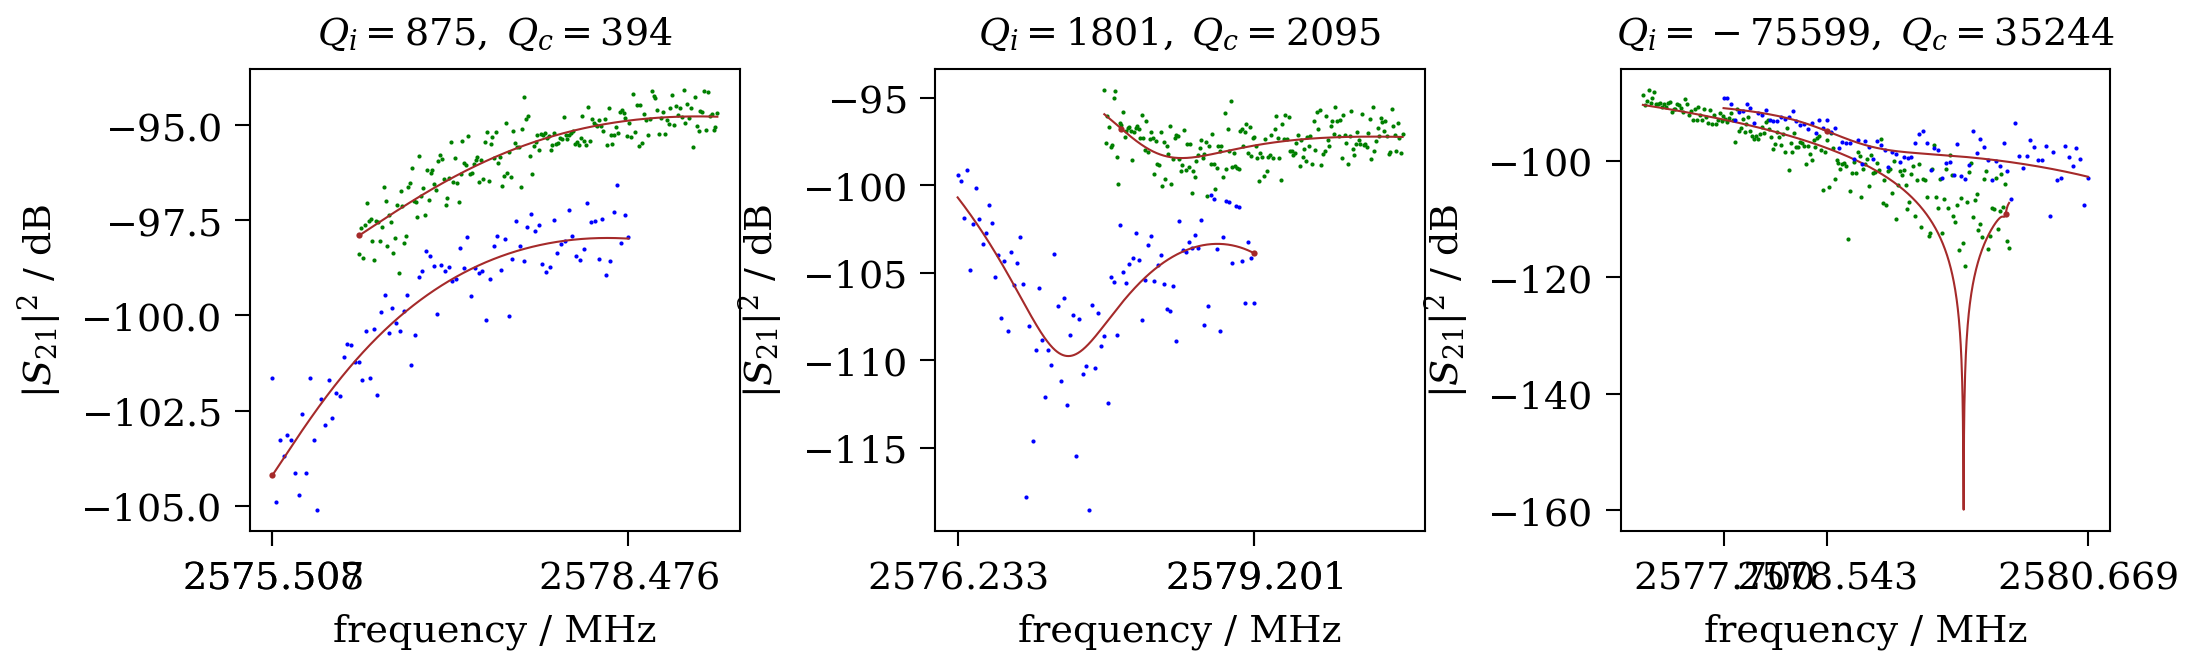

In [16]:
channel = 1
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(xlabel0)
    ax.set_ylabel(ylabel0)
    plot_resonator.amplitude(ax, sss.resonator, normalize=False, data_color='green')
    plot_resonator.amplitude(ax, swp.resonator, normalize=False)
    ax.set_title(title0.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

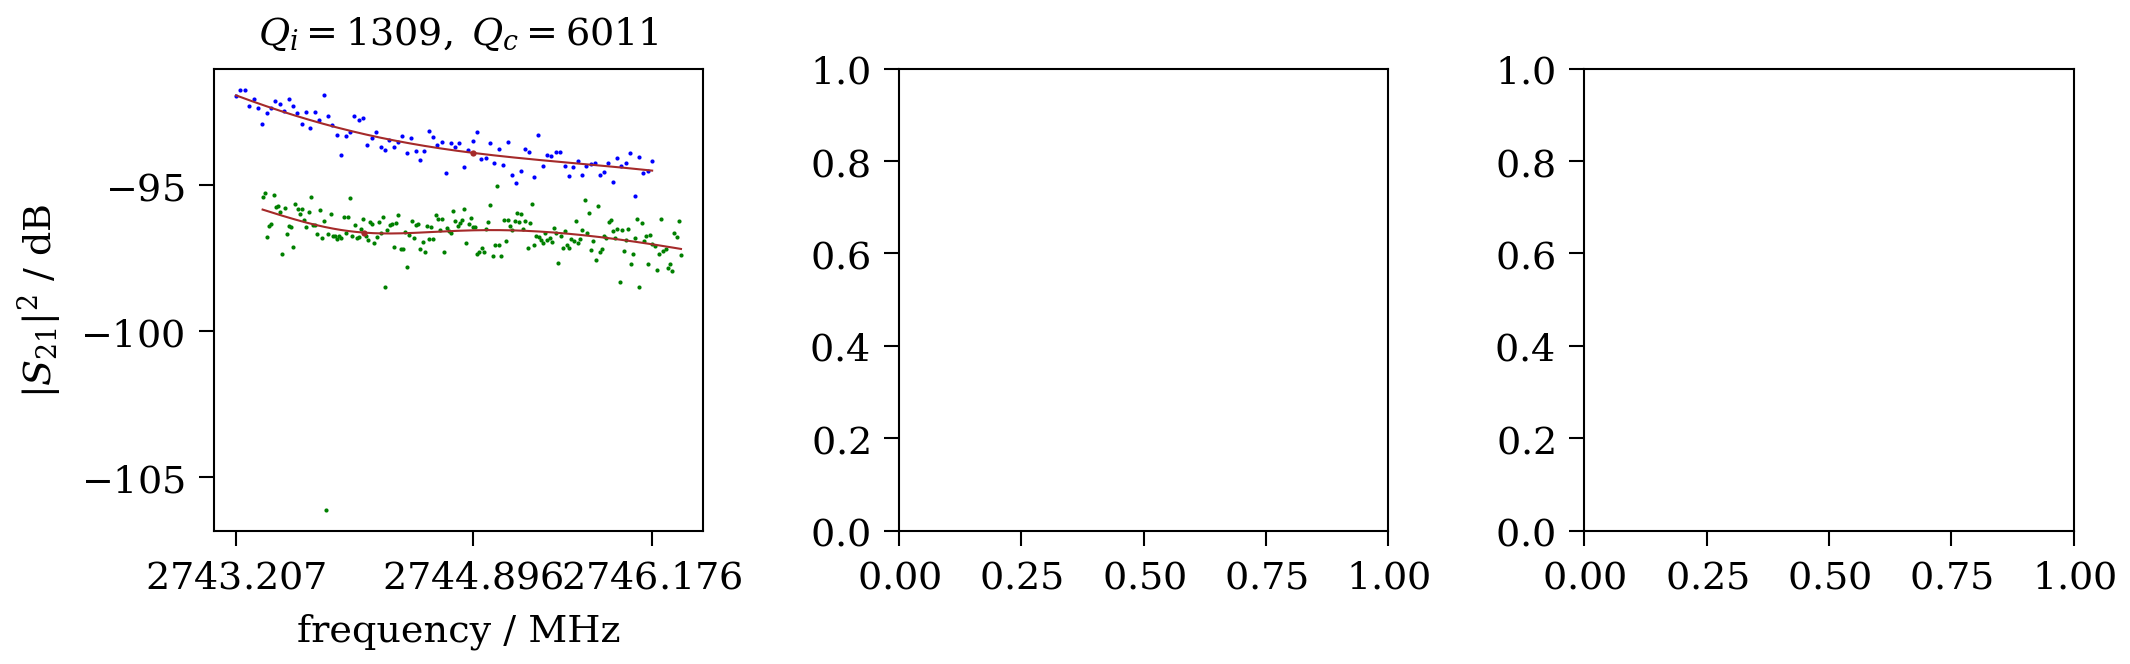

In [17]:
channel = 2
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(xlabel0)
    ax.set_ylabel(ylabel0)
    plot_resonator.amplitude(ax, sss.resonator, normalize=False, data_color='green')
    plot_resonator.amplitude(ax, swp.resonator, normalize=False)
    ax.set_title(title0.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

# Forward scattering in the complex plane

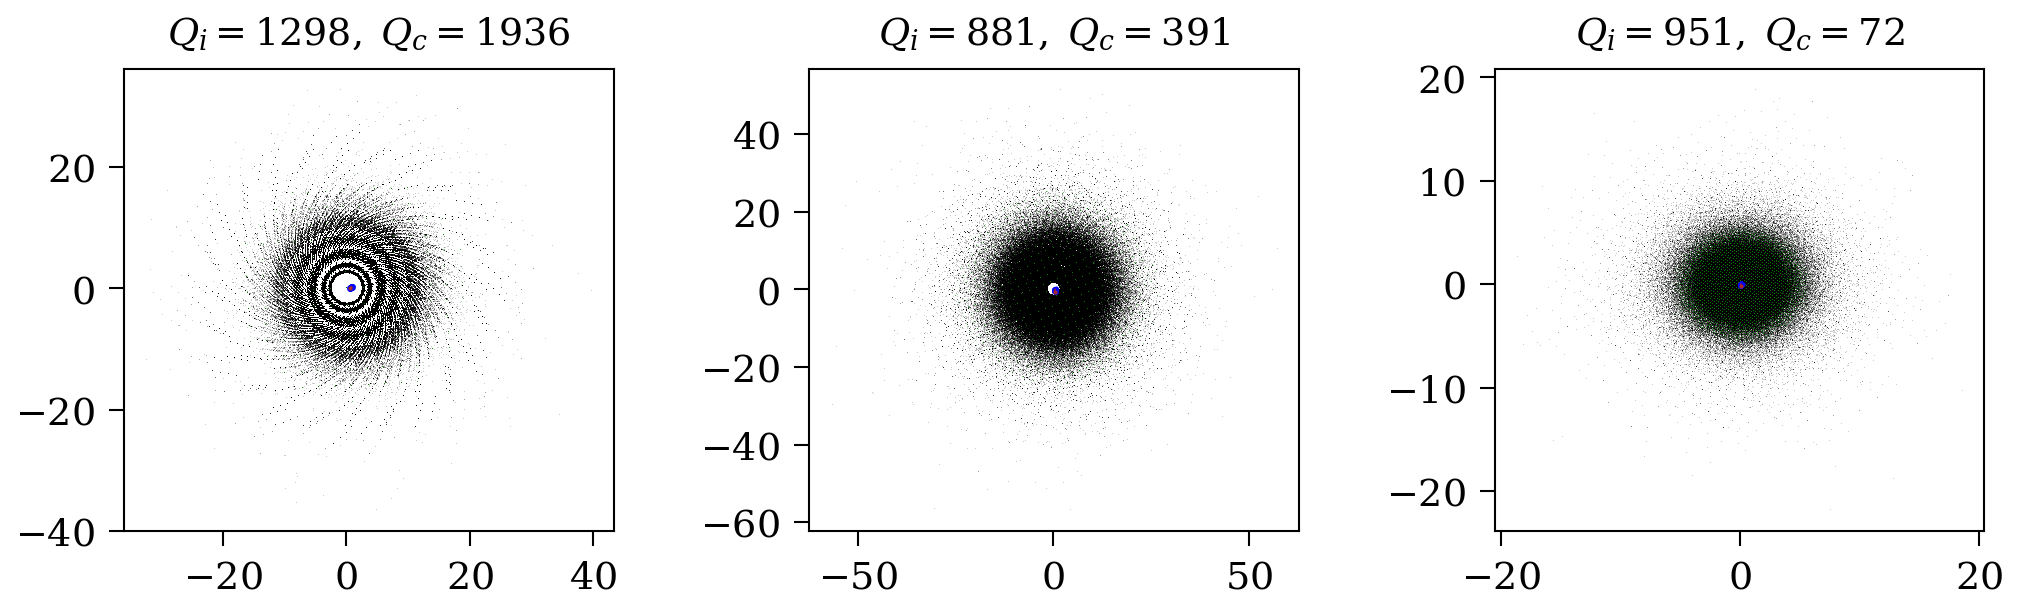

In [12]:
channel = 0
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(title0.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

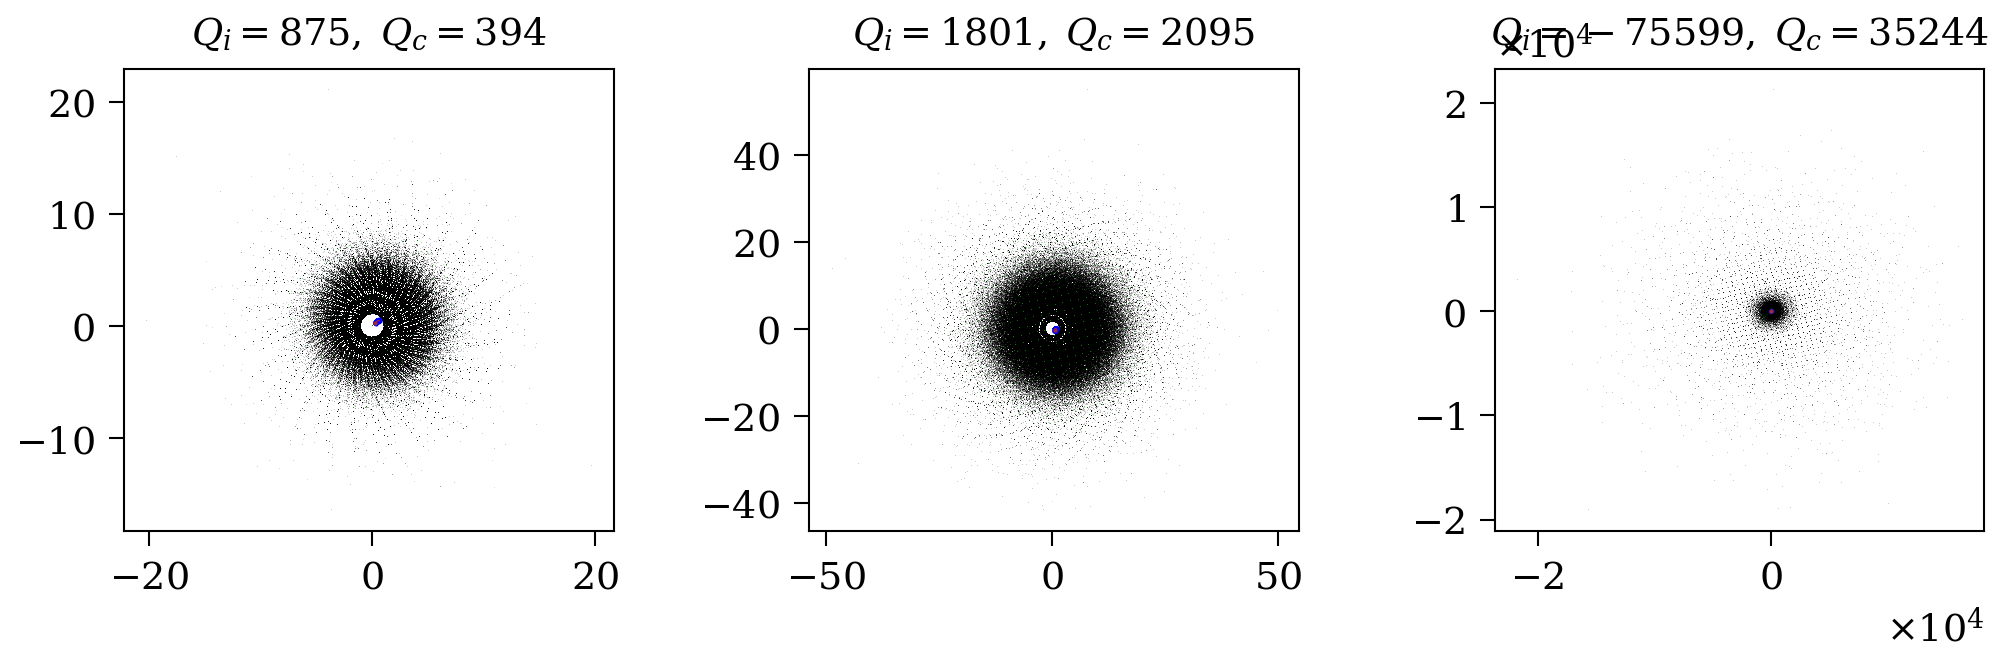

In [13]:
channel = 1
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(title0.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

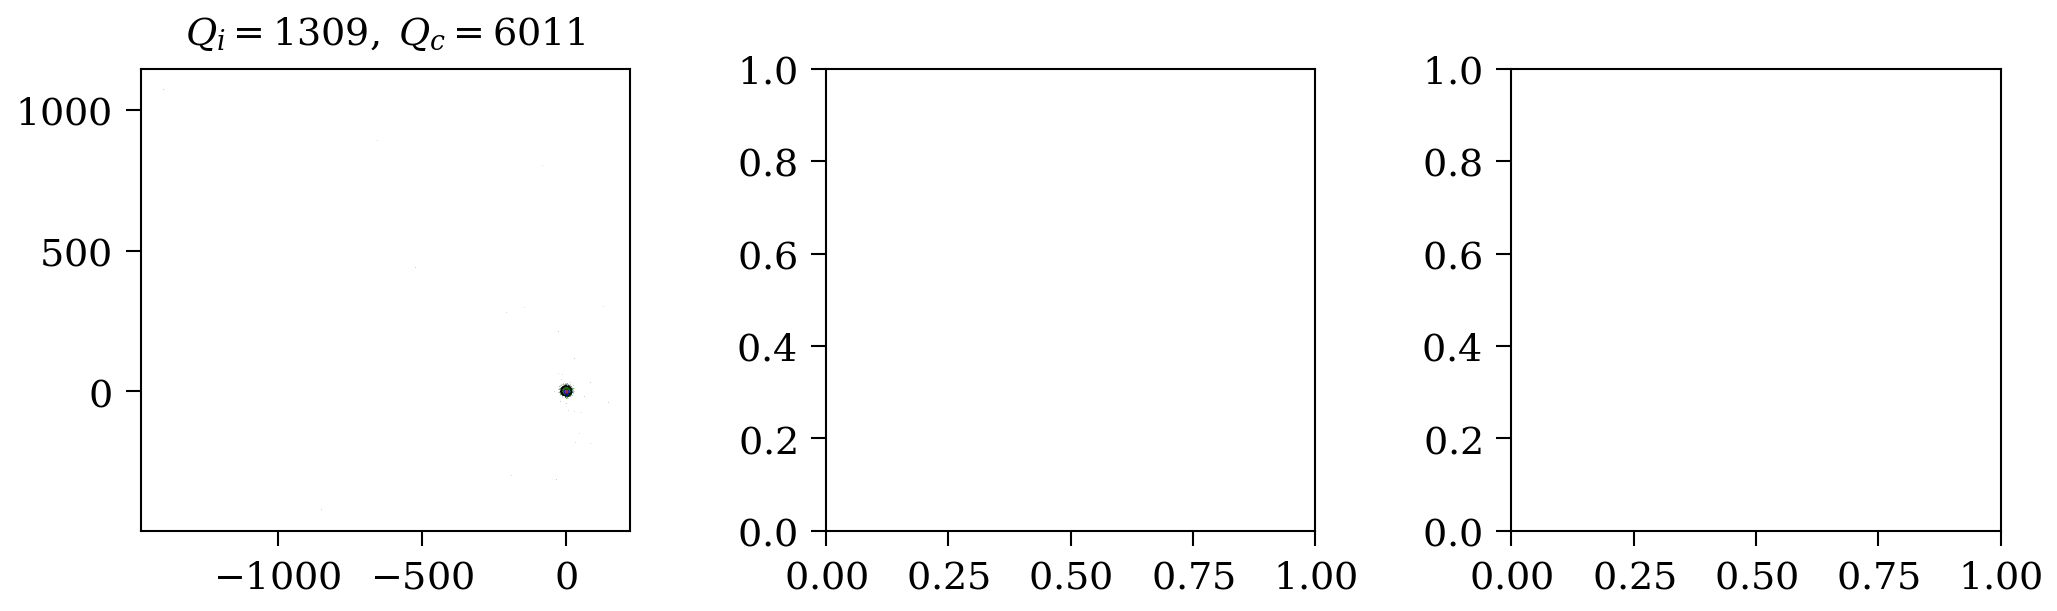

In [18]:
channel = 2
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(title0.format(sss.resonator.Q_i, sss.resonator.Q_e_real))